In [1]:
%load_ext autoreload
%autoreload 2
%run ../src/preamble.py

#### General settings

In [5]:
# number of points
N              = 256

# signal-to-noise ratio
snr            = np.inf

# total duration of the signal
observe        = 20

# sampling frequency
sampl          = N / 40

In [11]:
5*134+86+450

1206

#### A. Example of a unit Dirac mass

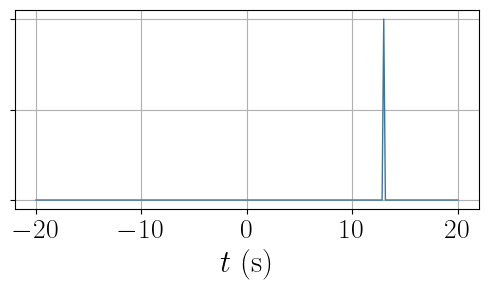

In [5]:
# location of the mass
location       = 13

# Dirac signal
signal,time_t  = the_noisy_dirac(N,observe = observe, location = location, snr = snr)

# display the real part of the signal
time_t         = display_signal(signal,time_t,yticks=False)

plt.savefig('../figures/dirac_' + str(int(np.log2(N))) + '.eps')

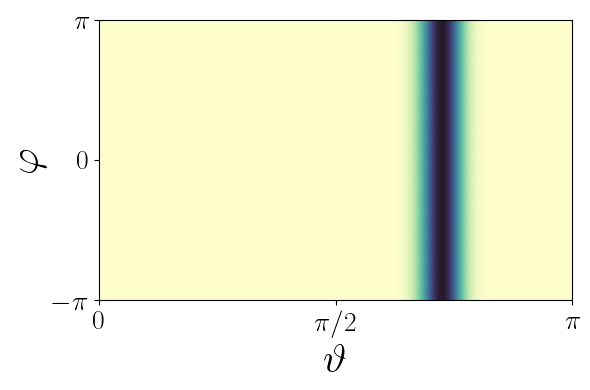

In [6]:
# compute the transform from Spin Spherical Harmonics
Fs,thetas,phis     = the_new_transform(signal)

# display it
planar_display(np.exp(np.abs(Fs)),[],[],thetas,phis)

plt.savefig('../figures/dirac_' + str(int(np.log2(N))) + '_transform.png')

#### B. Example of a pure sine

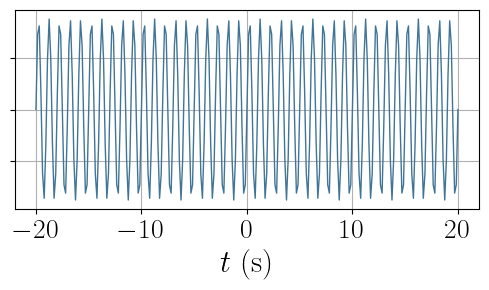

In [8]:
# frequency of the sine
frequency      = 1

# Dirac signal
signal,time_t  = the_noisy_sine(N,observe = observe, frequency = frequency, snr = snr)

# display the real part of the signal
time_t         = display_signal(10*signal,time_t,yticks=False)

plt.savefig('../figures/sine_' + str(int(np.log2(N))) + '.eps')

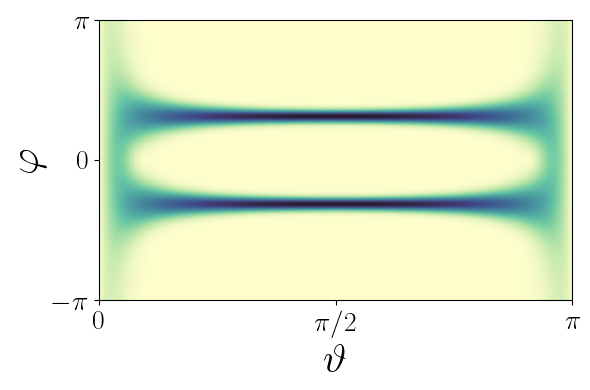

In [9]:
# compute the transform from Spin Spherical Harmonics
Fs,thetas,phis     = the_new_transform(signal)

# display it
planar_display(np.exp(np.abs(Fs)),[],[],thetas,phis)

plt.savefig('../figures/sine_' + str(int(np.log2(N))) + '_transform.png')

#### C. Example of a linear chirp

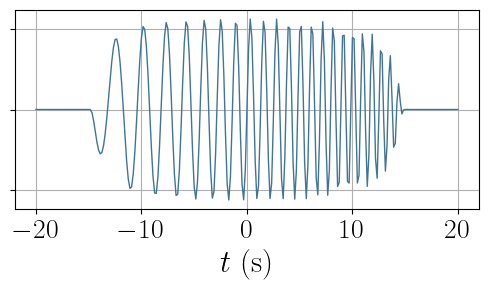

In [11]:
# duration of the chirp itself
duration       = 15

# Dirac signal
signal,time_t  = the_noisy_chirp(N,observe = observe, duration = duration, snr = snr)

# display the real part of the signal
time_t         = display_signal(signal,time_t,yticks=False)

plt.savefig('../figures/chirp_' + str(int(np.log2(N))) + '.eps')

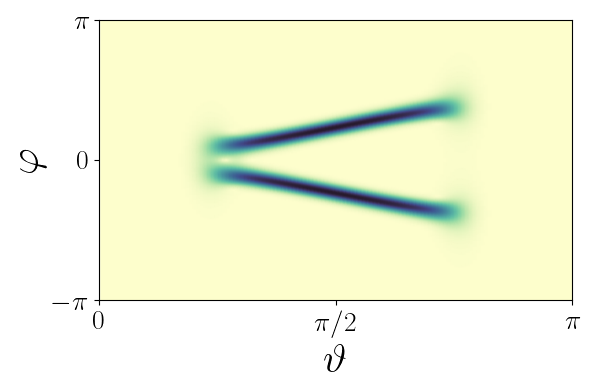

In [12]:
# compute the transform from Spin Spherical Harmonics
Fs,thetas,phis     = the_new_transform(signal)

# display it
planar_display(np.exp(np.abs(Fs)),[],[],thetas,phis)

plt.savefig('../figures/chirp_' + str(int(np.log2(N))) + '_transform.png')

#### D. Example of a constant

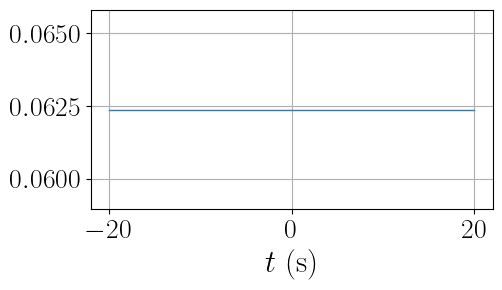

In [14]:
# location of the mass
value          = 1

# Dirac signal
signal,time_t  = the_noisy_constant(N,observe = observe, value = value, snr = snr)

# display the real part of the signal
time_t         = display_signal(signal,time_t)

plt.savefig('../figures/constant_' + str(int(np.log2(N))) + '.eps')

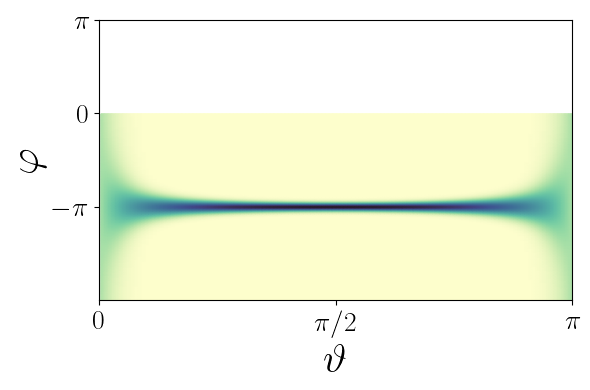

In [15]:
# compute the transform from Spin Spherical Harmonics
Fs,thetas,phis     = the_new_transform(signal)

# display it
planar_display(np.exp(np.abs(Fs)),[],[],thetas,phis-np.pi)

plt.savefig('../figures/constant_' + str(int(np.log2(N))) + '_transform.png')

#### Alternating signs

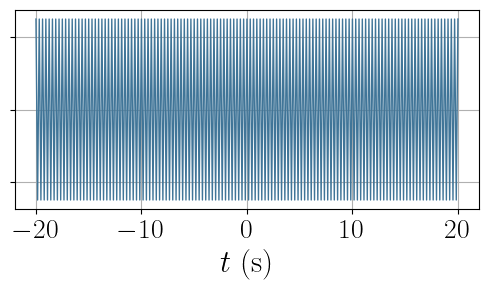

In [17]:
signal         = np.ones(np.shape(time_t))
signs          = (-1) ** np.arange(N+1)
signal        *= signs
signal        /= np.linalg.norm(signal,ord=2)

wnoise         = the_white_noise(N)
if snr > 0:
    signal = signal + 1/snr*wnoise
else:
    signal = wnoise

# display the real part of the signal
time_t         = display_signal(signal,time_t,yticks=False)

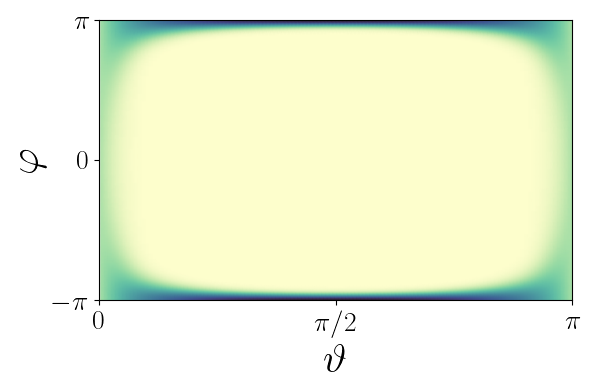

In [18]:
# compute the transform from Spin Spherical Harmonics
Fs,thetas,phis     = the_new_transform(signal)

# display it
planar_display(np.exp(np.abs(Fs)),[],[],thetas,phis)

#### Sum of spin-weighted spherical harmonics

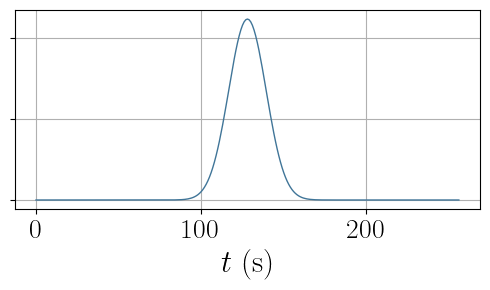

In [20]:
theta = np.pi/2
phi   = np.pi

# range of indices explored
ns = np.arange(N+1)

# compute the coherent state
SSH = np.sqrt(N + 1)/ (4 * np.pi) * np.exp(1/2 * special.loggamma(N+1) - 1/2 *special.loggamma(ns+1) - 1/2 *special.loggamma(N-ns+1)) * np.cos(theta / 2)**(N-ns) * np.sin(theta /2)**ns

SSH        /= np.linalg.norm(SSH,ord=2)

wnoise         = the_white_noise(N)
if snr > 0:
    signal = SSH + 1/snr*wnoise
else:
    signal = wnoise
    
# display the real part of the signal
time_t         = display_signal(signal,[],yticks=False)

plt.savefig('../figures/coherent_' + str(int(np.log2(N))) + '.eps')

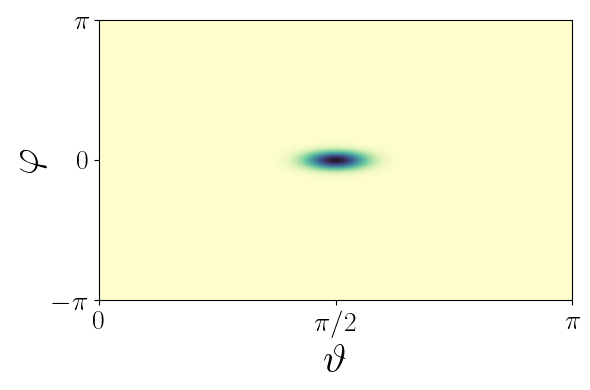

In [21]:
# compute the transform from Spin Spherical Harmonics
Fs,thetas,phis     = the_new_transform(signal)

# display it
planar_display(np.exp(np.abs(Fs)),[],[],thetas,phis)

plt.savefig('../figures/coherent_' + str(int(np.log2(N))) + '_transform.png')

#### Test that positive frequencies are correctly localized

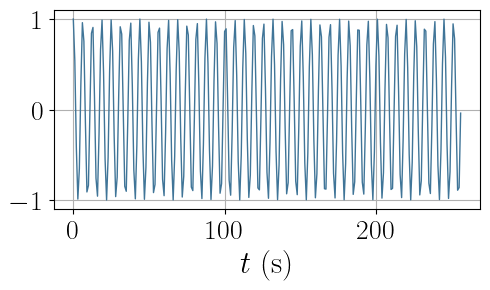

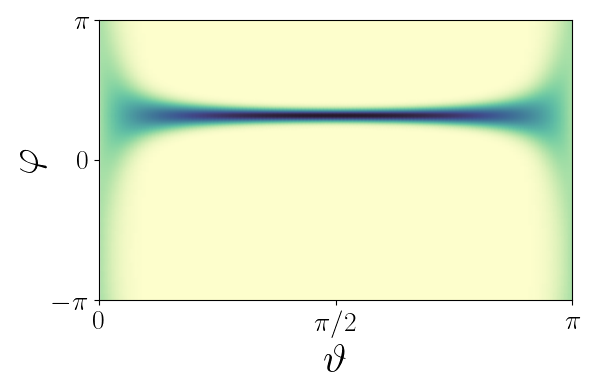

In [23]:
complex_exp = np.exp( 1j * time_t)
time_t      = display_signal(complex_exp.real,time_t)

# compute the transform from Spin Spherical Harmonics
Fs,thetas,phis     = the_new_transform(complex_exp)

# display it
planar_display(np.exp(np.abs(Fs)),[],[],thetas,phis)